In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:

df = pd.read_csv(r'F:\loan_prediction.csv')


In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:


for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    df[col].fillna(value=df[col].mode()[0], inplace=True)
     

In [7]:


df.LoanAmount.fillna(value=df.LoanAmount.median(), inplace=True)


In [8]:


df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:


df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [10]:

df.shape

(614, 13)

In [11]:

df['Dependents'].value_counts()
     

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
df = df.replace(to_replace='3+', value=4)

In [14]:


df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

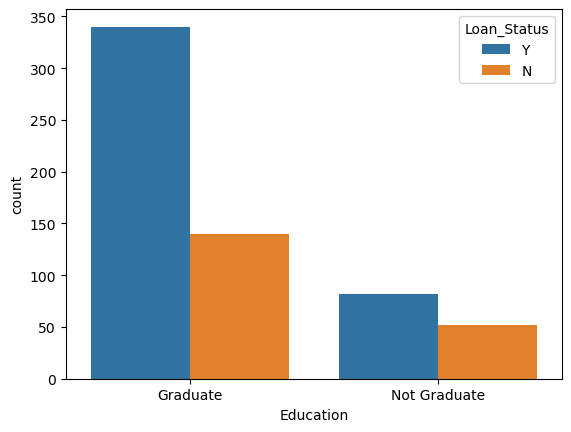

In [15]:

sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

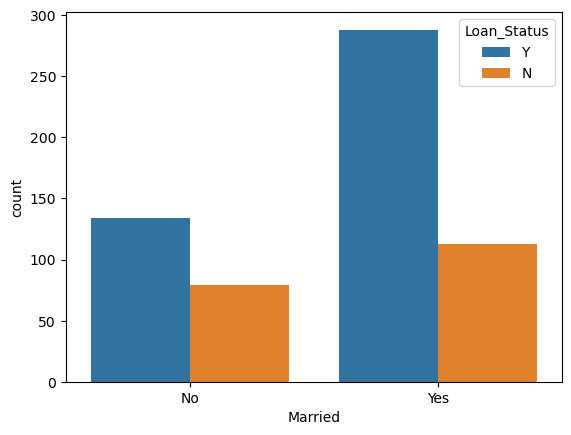

In [16]:
sns.countplot(x='Married',hue='Loan_Status',data=df)
     

In [17]:


from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [18]:

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [19]:
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [20]:
  

print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          0              0             5849   
1         1        1          1          0              0             4583   
2         1        1          0          0              1             3000   
3         1        1          0          1              0             2583   
4         1        0          0          0              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          0              0             2900   
610       1        1          4          0              0             4106   
611       1        1          1          0              0             8072   
612       1        1          2          0              0             7583   
613       0        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [21]:


X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,stratify=Y,random_state=5)


In [22]:


print(X.shape, X_train.shape, X_test.shape)

(614, 11) (460, 11) (154, 11)


In [23]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)


In [24]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

In [25]:

pre = model.predict(X_test)
pre

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [26]:

from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, pre) 
print(cm)
accuracy = metrics.accuracy_score(Y_test, pre) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(Y_test, pre) 
print("Precision score:",precision)
recall = metrics.recall_score(Y_test, pre) 
print("Recall score:",recall)

[[ 22  26]
 [  1 105]]
Accuracy score: 0.8246753246753247
Precision score: 0.8015267175572519
Recall score: 0.9905660377358491
